# <img style="float: left; padding-right: 20px; width: 100px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"> PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE
**IMT2200 - Introducción a Ciencia de Datos**<br>
**Semestre 2021-2**<br>
**Profesora:** Paula Aguirre <br>
**Estudiantes:** Vicente Espinoza , Rubén Marambio, Germán Vilos<br>

**<center>Contexto y motivación<center>**

**Para nadie es secreto lo relevante que se ha vuelto la industria cinematográfica hoy en día. Cada día se estrenan películas nuevas que pueden ser o no, un buen panorama. Si es o no un buen panorama es una opinión subjetiva, pero ante este problema, las páginas suelen calcular a partir de cada calificación por usuario, un promedio que se entrega como parámetro.
Esto es un problema, cuando una película no ha sido vista por tanta gente, ya que no se genera un universo de “calificadores” tan amplio, y por lo tanto el parámetro no es para nada confiable. Este problema no es exclusivo del cliente, plataformas como Netflix o Amazon necesitan entender con qué producto trabajan, la calificación de una película puede tener incidencia en el mismo diseño de la plataforma.**

**Nuestro principal objetivo es a través de herramientas computacionales de Ciencia de datos poder predecir con la mayor certeza posible el parámetro descrito a través de otras variables, tales como el género, el año, la duración, su cantidad de nominaciones y premios.
Referencia: Una herramienta de IA permite predecir las calificaciones de las películas, incluso antes de rodarse, La Vanguardia 
 [https://www.lavanguardia.com/tecnologia/20201118/49532487627/herramienta-inteligencia-artificial-precedir-calificaciones-peliculas-antes-rodarse.html]**

**<center>Preguntas objetivo<center>**
    
**Una vez claros los objetivos, tuvimos la inquietud de predecir la posible premiación de una película en función de sus variables. Esto resultaba atractivo hasta que buscamos qué debe ocurrir para que una película sea premiada. En resumen, una película es premiada, claramente cuando es buena, surge entonces la duda, ¿qué significa que una película sea buena? ¿Suele la gente valorar el buen cine? Dichas preguntas nos hicieron guiar nuestro trabajo hacia el objetivo final, conseguir un modelo que prediga qué tan buena es una película (prediciendo un eventual rating promedio). A medida que siguió avanzando el proyecto, fuimos generando preguntas que fueron contestadas casi de inmediato mediante análisis exploratorio. Tales como ¿Cómo es la distribución de películas por género y países?
Para concluir nuestro trabajo contesta todas las preguntas mencionadas a medida que avanza, finalmente logramos generar el modelo que buscábamos, qué (de buena o mala manera) predice a partir de otras variables el rating de la obra.**

In [1]:
# Importaoms librerías

import numpy as np
import pandas as pd 
import geopandas as gpd
import os   
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score,  train_test_split
from sklearn import datasets, svm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_absolute_error

**<center>Datos<center>**

**Movies_metadata.csv**

Este dataset obtenido por Kaggle (https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

contiene datos de 45.000 películas de MovieLens, con información acerca de cada una (41 columnas) tales como: película para adultos, géneros, nombre, país, etc.

**the_oscar_award**

Este dataset obtenido por Kaggle (https://www.kaggle.com/unanimad/the-oscar-award)

Recopila información de los certamenes Oscar desde su primera edición (1928) hasta el presente. Contiene información sobre cada nominación, junto al año, la película y si ganó el premio.

**ratings_small**

Este dataset obtenido por Kaggle (https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset?select=IMDb+ratings.csv)

Recopila más de 85.000 ratings de películas de la base de datos de el medio Imbd para entregar datos por cada Id de película, tales como el voto promedio, la cantidad de votos entre otros.

In [2]:
# Abrimos los archivos

# data_oscars
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
data_oscars.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [3]:
# Hacemos limpieza y trabajo de datos
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
# ELIMINAMOS DATOS NULOS
data_oscars = data_oscars.dropna()

# MODIFICAMOS MOMENTANEAMENTE EL NOMBRE PARA PODER GENERAR DATAFRAME
for ind in data_oscars.index:
    film,year = data_oscars['film'][ind],data_oscars['year_film'][ind] 
    data_oscars['film'][ind]=f'{film}[{year}]' 
    
# GENERAMOS UNA LISTA CON CADA PELICULA DISTINTA, DIFERENCIADAS POR SU TITULO Y AÑO PARA NO AGRUPAR REMASTERIZACIONES
movies = []
nominaciones = []
wins = []
for movie in data_oscars['film']:
    if movie not in movies:
        movies.append(movie)

for movie in movies:
    nomin = len(data_oscars[data_oscars['film']==movie])
    nominaciones.append(nomin)
    ganadas = len(data_oscars[(data_oscars['film']==movie)&(data_oscars['winner']==True)])
    wins.append(ganadas)

# GENERAMOS DATAFRAME
diccionario_df = {'Pelicula': movies, 'Nominaciones': nominaciones, 'Premios': wins} 

df = pd.DataFrame(diccionario_df)
#ese es de las nominaciones
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Pelicula,Nominaciones,Premios
0,The Noose[1927],1,0
1,The Last Command[1927],2,1
2,A Ship Comes In[1927],1,0
3,7th Heaven[1927],5,3
4,Sadie Thompson[1927],1,0


In [4]:
# Abrimos data_ratings y lo trabajamos

data_ratings = pd.read_csv(os.path.join("ratings_small.csv","ratings_small.csv"))

movies_id = []
ratings = []
cant_ratings = []
for Id in data_ratings['movieId'].unique():
    movies_id.append(Id)
    ratings.append(round(data_ratings[data_ratings['movieId']==Id]['rating'].mean(),1))
    cant_ratings.append(len(data_ratings[data_ratings['movieId']==Id]))

diccionario_ratings = {'IdPelicula': movies_id, 'RatingProm': ratings, 'Cant_Ratings': cant_ratings} 

df_ratings = pd.DataFrame(diccionario_ratings)
df_ratings.head()

,IdPelicula,RatingProm,Cant_Ratings
0,31,3.2,42
1,1029,3.7,42
2,1061,3.5,33
3,1129,3.3,48
4,1172,4.3,46


In [5]:
# Abrimos finalmente Movies metadata

data_movies = pd.read_csv(os.path.join("movies_metadata.csv","movies_metadata.csv"))
data_movies.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
# Ocupamos ciertas columnas con las cuales se trabajaran
columns = ['title', 'original_title', 'genres', 'id', 'imdb_id', 'original_language', 'popularity', 'release_date', 'production_countries', 'runtime']
data_movies = data_movies[columns]
#Eliminamos los datos Nulos 
data_movies = data_movies.dropna()
# eliminamos todas las peliculas que no tengan genero
data_movies = data_movies.drop(data_movies[data_movies['genres']== '[]'].index)
# cambiamos el id a int ya que haremos un merge y en el otro dataset se encuentra como variable int64
data_movies['id'] = data_movies['id'].astype('int64')
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42797 entries, 0 to 45463
Data columns (total 10 columns):
title                   42797 non-null object
original_title          42797 non-null object
genres                  42797 non-null object
id                      42797 non-null int64
imdb_id                 42797 non-null object
original_language       42797 non-null object
popularity              42797 non-null object
release_date            42797 non-null object
production_countries    42797 non-null object
runtime                 42797 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.6+ MB


In [7]:
# Merge entre las peliculas y sus ratings
movie_ratings = pd.merge(data_movies, df_ratings, left_on = 'id', right_on = 'IdPelicula', how = 'left')
movie_ratings = movie_ratings.dropna().reset_index(drop=True)
# cambiamos a datetime la columna release_date
movie_ratings.release_date = pd.to_datetime(movie_ratings['release_date'])
# obtenemos el ano de esta columna datetime
movie_ratings["year"] = movie_ratings.release_date.dt.year
print(movie_ratings.shape)
movie_ratings.sort_values('year').head()
# no se ocupa ya que son pocos los datos que quedan luego de hacer el merge

(2798, 14)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,IdPelicula,RatingProm,Cant_Ratings,year
2243,The Arrival of a Train at La Ciotat,L'arrivée d'un train en gare de La Ciotat,"[{'id': 99, 'name': 'Documentary'}]",160,tt0000012,es,5.25661,1896-01-25,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,160.0,2.3,63.0,1896
2797,The One-Man Band,L'Homme orchestre,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",49280,tt0135453,fr,1.109068,1900-01-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1.0,49280.0,5.0,1.0,1900
1508,A Trip to the Moon,Le Voyage dans la Lune,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",775,tt0000417,fr,6.3218,1902-09-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",14.0,775.0,2.0,1.0,1902
2785,Extraordinary Illusions,Illusions funambulesques,"[{'id': 35, 'name': 'Comedy'}]",127098,tt0223509,fr,0.141611,1903-01-01,"[{'iso_3166_1': 'FR', 'name': 'France'}]",2.0,127098.0,4.0,1.0,1903
2202,Frankenstein,Frankenstein,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",2929,tt0001223,en,1.65988,1910-03-18,"[{'iso_3166_1': 'US', 'name': 'United States o...",13.0,2929.0,3.9,14.0,1910


In [8]:
# por lo tanto ocupamos otro dataset en donde tienen mas calificaciones de usuarios para las peliculas
data_ratings_externo = pd.read_csv(os.path.join("ratings_externo","IMDb ratings.csv"))
# columnas que nos serviran
columnas = ['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote']
data_ratings_externo = data_ratings_externo[columnas]
data_ratings_externo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 4 columns):
imdb_title_id            85855 non-null object
weighted_average_vote    85855 non-null float64
total_votes              85855 non-null int64
mean_vote                85855 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ MB


In [9]:
# hacemos el merge como antes pero ahora relacionandolo con el imdb_id de cada pelicula
movie_ratings_2 = pd.merge(data_movies, data_ratings_externo, left_on = 'imdb_id', right_on = 'imdb_title_id', how = 'left')
movie_ratings_2 = movie_ratings_2.dropna().reset_index(drop=True)
# convertimos a datetime la columna 'release_date'
movie_ratings_2.release_date = pd.to_datetime(movie_ratings_2['release_date'])
# obtenemos el ano de esto 
movie_ratings_2["year"] = movie_ratings_2.release_date.dt.year
# hacemos una limpieza de los anos, ya que sera comparado con los oscars y estos toman las peliculas desde el ano 1927 
movie_ratings_2 = movie_ratings_2.drop(movie_ratings_2[movie_ratings_2['year'] < 1927].index)
# se puede ver que perdimos menos registros con este dataset, por lo tanto nos quedaremos con el 
print(movie_ratings_2.shape)
movie_ratings_2.head()

(32580, 15)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,imdb_title_id,weighted_average_vote,total_votes,mean_vote,year
0,Toy Story,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.9469,1995-10-30,"[{'iso_3166_1': 'US', 'name': 'United States o...",81.0,tt0114709,8.3,864461.0,8.3,1995
1,Jumanji,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.0155,1995-12-15,"[{'iso_3166_1': 'US', 'name': 'United States o...",104.0,tt0113497,7.0,299083.0,7.1,1995
2,Grumpier Old Men,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,1995-12-22,"[{'iso_3166_1': 'US', 'name': 'United States o...",101.0,tt0113228,6.7,23742.0,6.8,1995
3,Waiting to Exhale,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.85949,1995-12-22,"[{'iso_3166_1': 'US', 'name': 'United States o...",127.0,tt0114885,5.9,9353.0,6.2,1995
4,Father of the Bride Part II,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.38752,1995-02-10,"[{'iso_3166_1': 'US', 'name': 'United States o...",106.0,tt0113041,6.1,33587.0,6.2,1995


**<center>Análisis exploratorio de Datos<center>**

In [10]:
# necesitamos los generos para crear un dataframe y hacer un grafico para lograr hacer un analisis de los datos 
genres = movie_ratings_2['genres']
genre_movie = []
generos_totales = []
for i in genres:
    genre = ''
    generos_pelicula = i.split("'")[5::6]
    for j in generos_pelicula:
        if j not in generos_totales:
            generos_totales.append(j)
    for x in range(len(generos_pelicula)):
        if x < len(generos_pelicula) -1:
            genre+=f'{generos_pelicula[x]},'
        else:
            genre+=generos_pelicula[x]
    genre_movie.append(genre)
movie_ratings_2['genres'] = genre_movie

In [11]:
# creamos un dataframe con todos los generos y cada columna si tiene un 0 quiere decir que la pelicula no pertenece a ese genero, si tiene un 1 quiere decir que pertenece la pelicula a ese genero
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas por ano se filman para cada genero 
df_genre['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas
genero_peliculas_ano = df_genre.groupby('year').sum()
# hacemos sort para ver el grafico en orden
genero_peliculas_ano_sumados = genero_peliculas_ano.sum().sort_values(ascending=False)

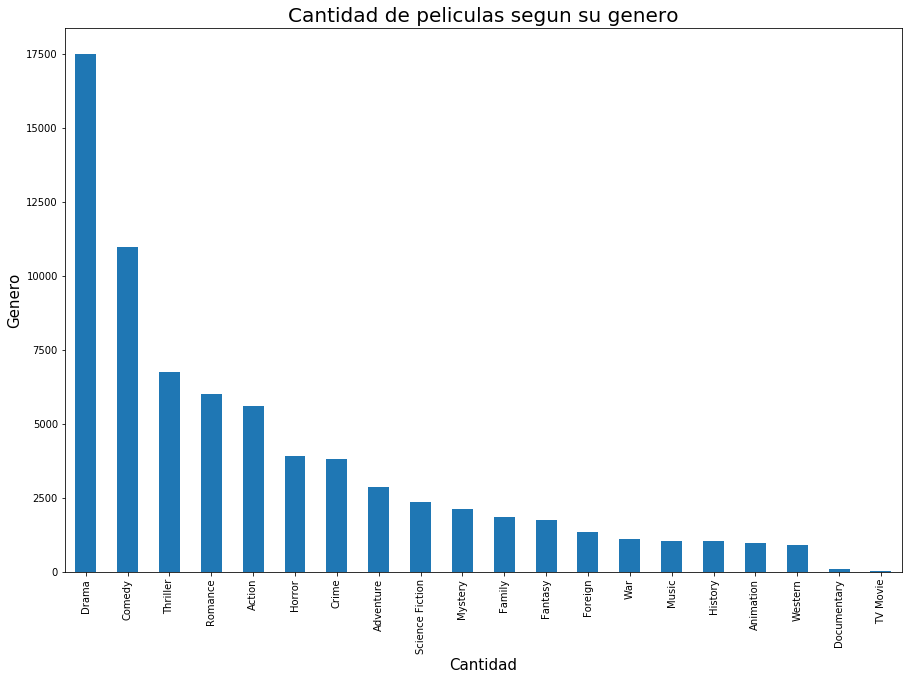

In [12]:
#grafico de cuantas peliculas se generan 
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = genero_peliculas_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas segun su genero', fontsize = 20)
plt.ylabel('Genero', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

**Notamos a través de este gráfico que no existe una distribución uniforme entre los géneros y la cantidad de películas. Claramente existen géneros como el drama o la comedia que concentran una mayor cantidad de películas.**

In [13]:
paises = []
for ind in movie_ratings_2['production_countries'].index:
    x = ast.literal_eval(movie_ratings_2['production_countries'][ind])
    if len(x) > 0:
        countries = []
        countries_str = ''
        for dat in x:
            pais = dat['name']
            countries.append(dat['name'])
            countries_str += f'{pais},'
            if dat['name'] not in paises:
                paises.append(dat['name'])
    #movie_ratings_2['production_countries'][ind] = countries
    movie_ratings_2['production_countries'][ind] = countries_str


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# hacemos el mismo analisis hecho anteriormente, pero ahora con los paises, veremos cuanta produccion de peliculas tiene cada pais 
df_countries = pd.DataFrame()
for pais in paises:
    df_countries[pais] = movie_ratings_2['production_countries'].str.contains(pais).map(lambda x:1 if x else 0)

In [15]:
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas se filman en un pais
df_countries['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas por pais
peliculas_pais_ano = df_countries.groupby('year').sum()
# hacemos sort para ver el grafico en orden
peliculas_pais_ano_sumados = peliculas_pais_ano.sum().sort_values(ascending=False)

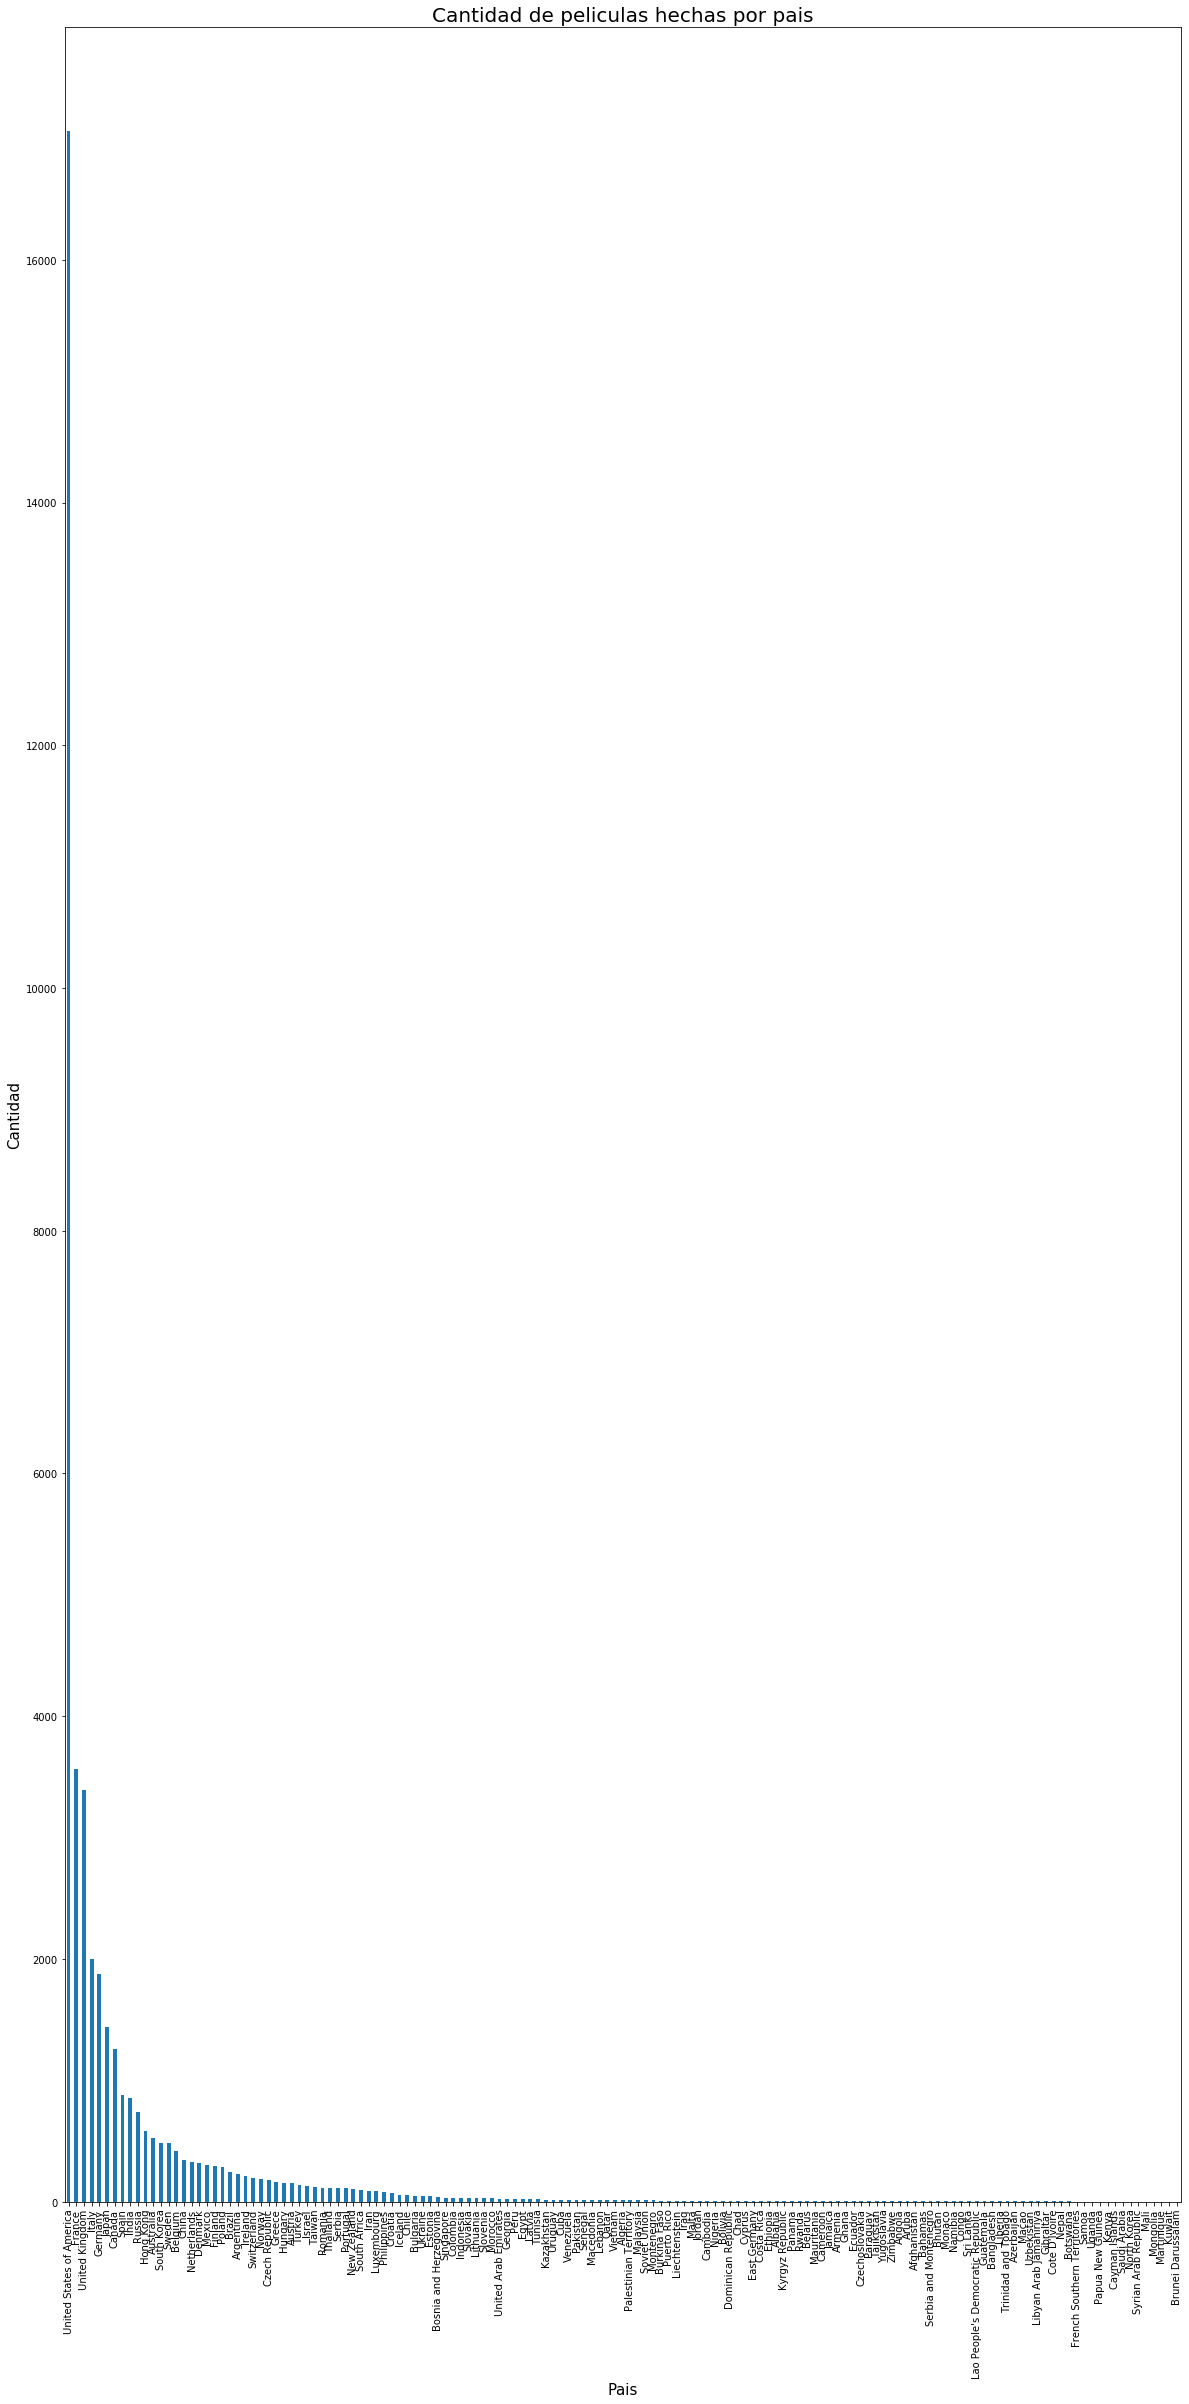

In [16]:
#grafico de cuantas peliculas en un pais se generan
fig = plt.figure(figsize=(20,40))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = peliculas_pais_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas hechas por pais', fontsize = 20)
plt.ylabel('Cantidad', fontsize = 15)
plt.xlabel('Pais', fontsize = 15)
plt.show()

**Es trivial notar que existe una hegemonía de Estados Unidos sobre los demás paises en producción de películas, esto responde tajantemente nuestra inquietud inicial.**

In [17]:
df_paises_cta = pd.DataFrame(peliculas_pais_ano_sumados, columns= ['Cantidad'])
df_paises_cta = df_paises_cta.rename_axis('Paises').reset_index()
df_paises_cta.head()


,Paises,Cantidad
0,United States of America,17063
1,France,3566
2,United Kingdom,3391
3,Italy,2003
4,Germany,1880


In [18]:
"""
Descargamos geodataset para relacionar país con calidad y recepción de producciones.
Sjoin debe ser por columna "sovereight"
"""
url = 'https://data.opendatasoft.com/explore/dataset/natural-earth-countries-1_110m@public/download/?format=geojson&timezone=America/Santo_Domingo&lang=en'
gdf_paises = gpd.read_file(url)
columnas = ['sovereignt', 'geometry']
gdf_paises = gdf_paises[columnas]
gdf_paises.head()

,sovereignt,geometry
0,Haiti,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
1,Ghana,"POLYGON ((0.02380 11.01868, -0.04978 10.70692,..."
2,Jordan,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
3,Myanmar,"POLYGON ((100.11599 20.41785, 99.54331 20.1866..."
4,Bhutan,"POLYGON ((91.69666 27.77174, 92.10371 27.45261..."


In [19]:
df_paises_cta = pd.merge(df_paises_cta, gdf_paises, left_on = 'Paises', right_on = 'sovereignt', how = 'right')
df_paises_cta = df_paises_cta.dropna().reset_index(drop=True)
gdf_paises_cta = gpd.GeoDataFrame(df_paises_cta, crs="EPSG:4326", geometry=df_paises_cta['geometry'])
gdf_paises_cta = gdf_paises_cta.drop(['sovereignt'], axis=1)
gdf_paises_cta.head()

,Paises,Cantidad,geometry
0,United States of America,17063.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1,United States of America,17063.0,"POLYGON ((-66.28243 18.51476, -65.77130 18.426..."
2,France,3566.0,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
3,France,3566.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
4,France,3566.0,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."


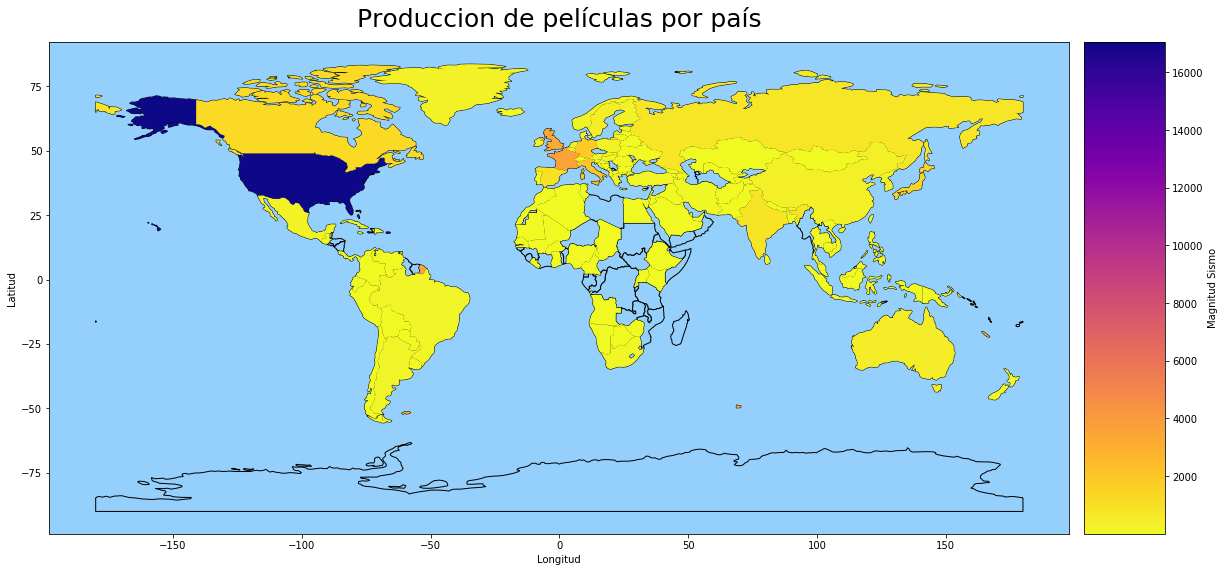

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
world.plot(ax=ax, color='xkcd:light blue', edgecolor='black')
ax.set_title('Produccion de películas por país', pad = 15, 
             fontdict={'fontsize':25, 'color': '#000000'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_facecolor('xkcd:light blue')
# Añadir la leyenda 
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="8%", pad=0.2)
gdf_paises_cta.plot(column='Cantidad', cmap='plasma_r', ax=ax,legend=True, cax=cax,
         legend_kwds={'label': "Magnitud Sismo",'orientation': "vertical"})
plt.show()
#fig.savefig('mapa_cta.png',bbox_inches='tight')

**Es más notoria la conclusión anterior con este gráfico, donde el hemisfério norte tiene mayor relevancia que el sur.**

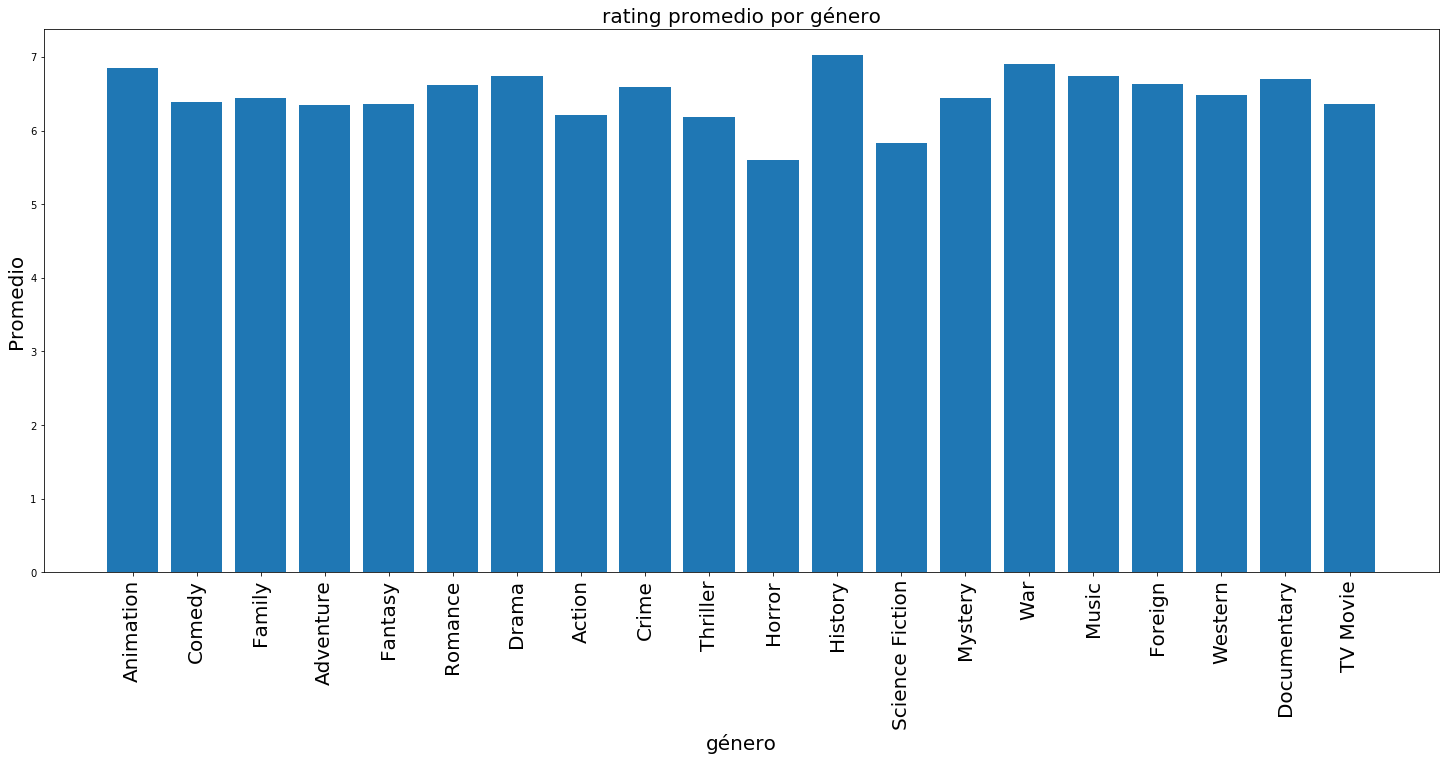

In [21]:
genres = {}
for genre in movie_ratings_2['genres']:
    for g in genre.split(','):
        if g not in genres:
            genres[g] = []

for ind in movie_ratings_2.index:
    gen = movie_ratings_2['genres'][ind].split(',')
    for g in gen:
        genres[g].append(movie_ratings_2['mean_vote'][ind])

for genre in genres:
    genres[genre] = sum(genres[genre])/len(genres[genre])

names = list(genres.keys())
values = list(genres.values())

fig = plt.figure(figsize=(25,10))
plt.bar(range(len(genres)), values, tick_label=names)
plt.xticks(rotation=90, fontsize = 20)
plt.title('rating promedio por género', fontsize = 20)
plt.ylabel('Promedio', fontsize = 20)
plt.xlabel('género', fontsize = 20)
plt.show()

**A diferencia de la conclusión a la que llegamos, donde existen géneros más realizados que otros, este gráfico nos muestra que la premiación se mantiene uniforme en términos generales.**

In [22]:
# ocupamos tittle y el ano para poder hacer merge con el dataset de los oscars 
title = movie_ratings_2['title'].to_list()
ano = movie_ratings_2['year'].to_list()
pelicula_ano = []
for i in range(len(title)):
    movie= title[i]
    year = ano[i]
    movie_year = f'{movie}[{year}]'
    pelicula_ano.append(movie_year)
movie_ratings_2['Pelicula'] = pelicula_ano
columns = ['Pelicula','runtime','genres','mean_vote']
movies_ratings_2_merge = movie_ratings_2[columns]
movies_ratings_2_merge.head()

,Pelicula,runtime,genres,mean_vote
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2
4,Father of the Bride Part II[1995],106.0,Comedy,6.2


In [23]:
# hacemos el merge segun el title con los oscars
movie_oscars = pd.merge(movies_ratings_2_merge, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars = movie_oscars.dropna().reset_index(drop=True)
print(movie_oscars.shape)
movie_oscars.sort_values('Nominaciones', ascending = False).head()

(2447, 6)


,Pelicula,runtime,genres,mean_vote,Nominaciones,Premios
335,Titanic[1997],194.0,"Drama,Romance,Thriller",7.8,14.0,11.0
2409,La La Land[2016],128.0,"Comedy,Drama,Music,Romance",7.9,14.0,6.0
995,Chicago[2002],113.0,"Action,Comedy,Crime,Drama,Music",7.3,13.0,6.0
888,The Lord of the Rings: The Fellowship of the R...,178.0,"Adventure,Fantasy,Action",8.7,13.0,4.0
141,Gone with the Wind[1939],238.0,"Drama,Romance,War",8.1,13.0,8.0


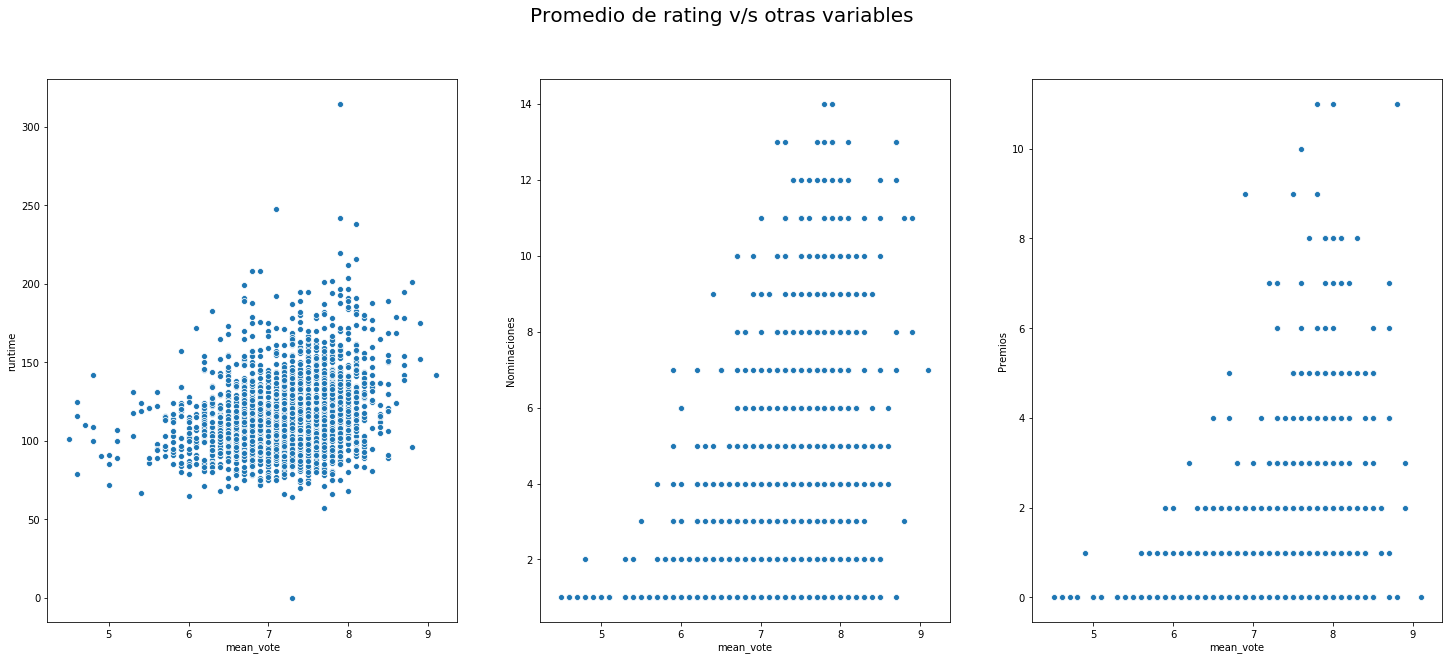

In [24]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(25,10))
fig.suptitle('Promedio de rating v/s otras variables', size=(20))

sns.scatterplot(ax = axes[0], data=movie_oscars, x="mean_vote", y='runtime')


sns.scatterplot(ax = axes[1], data=movie_oscars, x="mean_vote", y='Nominaciones')


sns.scatterplot(ax = axes[2], data=movie_oscars, x="mean_vote", y='Premios')
#fig.savefig('Buen_cine.png',bbox_inches='tight')

**Notamos que el voto promedio se mantiene medianamente constante para la variable runtime, lo que significa que el tiempo no influye notoriamente. Sin embargo, para las variables cantidad de nominaciones y cantidad de premios, sí se aprecia una relación directa.**

In [25]:
print(movie_oscars.shape)
movie_oscars.head()

(2447, 6)


,Pelicula,runtime,genres,mean_vote,Nominaciones,Premios
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,3.0,0.0
1,Sabrina[1995],127.0,"Comedy,Romance",6.5,2.0,0.0
2,The American President[1995],106.0,"Comedy,Drama,Romance",7.0,1.0,0.0
3,Nixon[1995],192.0,"History,Drama",7.1,4.0,0.0
4,Casino[1995],178.0,"Drama,Crime",8.2,1.0,0.0


In [26]:
print(movie_ratings_2.shape)
movie_ratings_2.head()

(32580, 16)


,title,original_title,genres,id,imdb_id,original_language,popularity,release_date,production_countries,runtime,imdb_title_id,weighted_average_vote,total_votes,mean_vote,year,Pelicula
0,Toy Story,Toy Story,"Animation,Comedy,Family",862,tt0114709,en,21.9469,1995-10-30,"United States of America,",81.0,tt0114709,8.3,864461.0,8.3,1995,Toy Story[1995]
1,Jumanji,Jumanji,"Adventure,Fantasy,Family",8844,tt0113497,en,17.0155,1995-12-15,"United States of America,",104.0,tt0113497,7.0,299083.0,7.1,1995,Jumanji[1995]
2,Grumpier Old Men,Grumpier Old Men,"Romance,Comedy",15602,tt0113228,en,11.7129,1995-12-22,"United States of America,",101.0,tt0113228,6.7,23742.0,6.8,1995,Grumpier Old Men[1995]
3,Waiting to Exhale,Waiting to Exhale,"Comedy,Drama,Romance",31357,tt0114885,en,3.85949,1995-12-22,"United States of America,",127.0,tt0114885,5.9,9353.0,6.2,1995,Waiting to Exhale[1995]
4,Father of the Bride Part II,Father of the Bride Part II,Comedy,11862,tt0113041,en,8.38752,1995-02-10,"United States of America,",106.0,tt0113041,6.1,33587.0,6.2,1995,Father of the Bride Part II[1995]


In [27]:
# hacemos el merge segun la Peliculacon los oscars
columns = ['Pelicula','runtime','genres','mean_vote', 'year']
movie_lr = movie_ratings_2[columns]
movie_oscars_lr = pd.merge(movie_lr, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars_lr.sort_values('mean_vote', ascending = False).head()
movie_oscars_lr.fillna(0, inplace=True)
movie_oscars_lr.head()

,Pelicula,runtime,genres,mean_vote,year,Nominaciones,Premios
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,1995,3.0,0.0
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1,1995,0.0,0.0
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8,1995,0.0,0.0
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2,1995,0.0,0.0
4,Father of the Bride Part II[1995],106.0,Comedy,6.2,1995,0.0,0.0


In [28]:
# ocupamos la lista generos creada anteriormente.
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_oscars_lr['genres'].str.contains(genre).map(lambda x:1 if x else 0)
movie_oscars_lr = movie_oscars_lr.join(df_genre) #unir los generos con el movie_oscars_lr columans de 1 y 0
movie_oscars_lr.head()


,Pelicula,runtime,genres,mean_vote,year,Nominaciones,Premios,Animation,Comedy,Family,...,Horror,History,Science Fiction,Mystery,War,Music,Foreign,Western,Documentary,TV Movie
0,Toy Story[1995],81.0,"Animation,Comedy,Family",8.3,1995,3.0,0.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji[1995],104.0,"Adventure,Fantasy,Family",7.1,1995,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men[1995],101.0,"Romance,Comedy",6.8,1995,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale[1995],127.0,"Comedy,Drama,Romance",6.2,1995,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II[1995],106.0,Comedy,6.2,1995,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# eliminamos esta variable para poder hacer el modelo

movie_oscars_lr=movie_oscars_lr.drop(['genres'], axis=1)
movie_oscars_lr.head()

,Pelicula,runtime,mean_vote,year,Nominaciones,Premios,Animation,Comedy,Family,Adventure,...,Horror,History,Science Fiction,Mystery,War,Music,Foreign,Western,Documentary,TV Movie
0,Toy Story[1995],81.0,8.3,1995,3.0,0.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji[1995],104.0,7.1,1995,0.0,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men[1995],101.0,6.8,1995,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Waiting to Exhale[1995],127.0,6.2,1995,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II[1995],106.0,6.2,1995,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**<center>Análisis de datos<cente>**
    
**Para generar la predicción usaremos un método de regresión, en el cual asignaremos cada género como columna al Dataframe donde cada película tendrá valor 1 si pertenece a ese género o 0 si no.**

**Como queremos predecir la variable mean_vote, utilizaremos de variables predictoras: runtime(tiempo de duración en minutos), year(año de producción), Nominaciones(cantidad de nominaciones), Premios(Cantidad de premios) y el arreglo de géneros (1 si pertenece, 0 si no).**

**Como queremos analizar la insidencia de todas las variables, pero estimamos previamente que a distinto valor cada una, penalizando algunas sin hacerlas nulas, utilizaremos una regresión tipo Ridge, para la cual iteraremos sobre 200 alphas distintos generados con la función logspace de Numpy, la cual los genera en escala logaritmica y utilizaremos el que nos de un RMSE (raíz cuadrada del error cuadrático medio)  más conveniente.**

In [30]:
# Columnas predictoras
col = [i for i in movie_oscars_lr if i not in ['Pelicula', 'mean_vote']]

x = movie_oscars_lr[col]
y = movie_oscars_lr['mean_vote']

# Partición de conjunto de prueba y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
# Aplicación del modelo, con normalización y mediante una iteración de alphas
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = x_train, y = y_train)

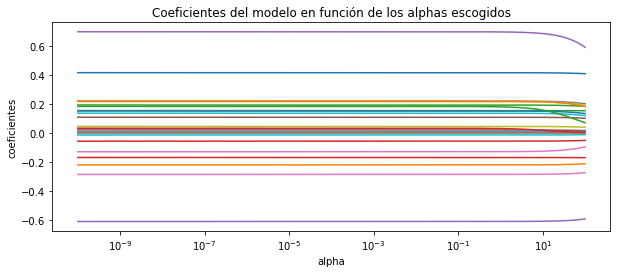

In [32]:
# Evolución de los coeficientes en función de alpha con gráfico
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(x_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(10, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de los alphas escogidos');
plt.axis('tight')
plt.show()

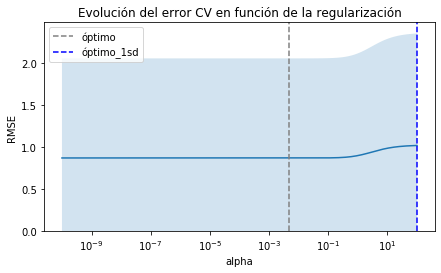

In [33]:
# Evolución del error en función de alpha
# Como el error es una raíz cuadrada, graficaremos como se comporta el error más una desviación estandar
# ==============================================================================
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [34]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.004552935074866948


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


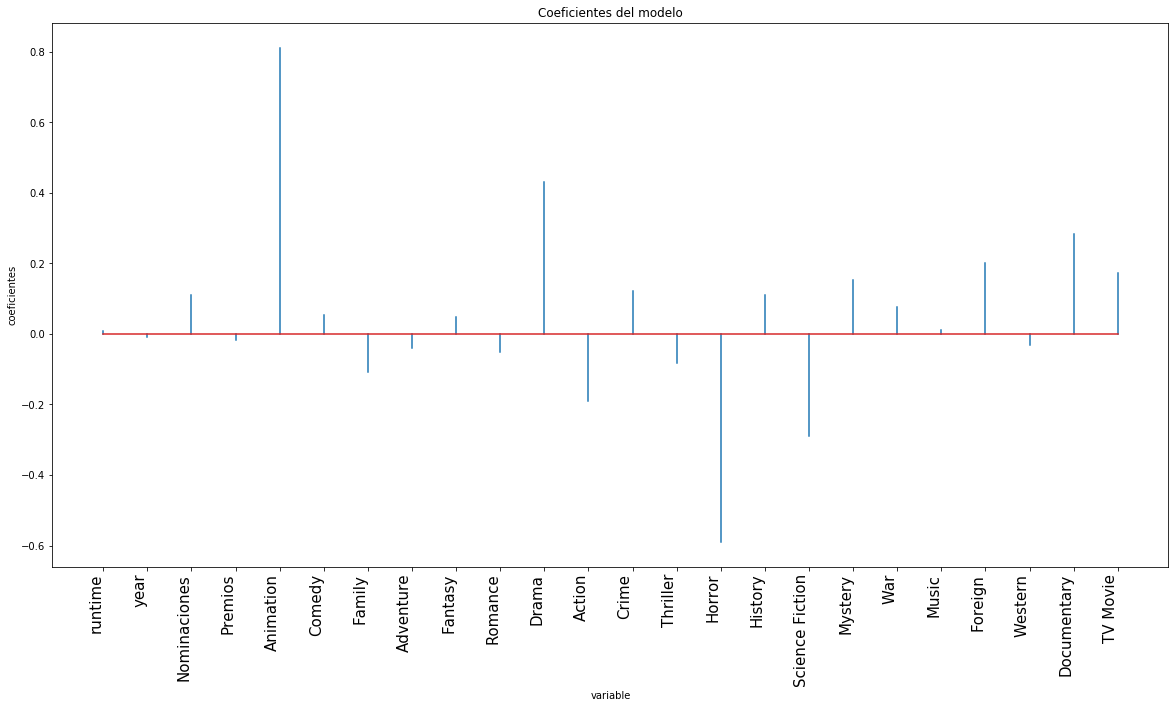

In [35]:
# Graficamos coeficientes del modelo

df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=15)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [36]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,runtime,0.008551
1,year,-0.008387
2,Nominaciones,0.110625
3,Premios,-0.016193
4,Animation,0.811497
5,Comedy,0.054276
6,Family,-0.108085
7,Adventure,-0.041271
8,Fantasy,0.049273
9,Romance,-0.050223


In [37]:
# Verificacion de las metricas para ver como se comporta nuestro modelo
metricas_cv = cross_validate(modelo, x, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
test_r2 = np.mean(metricas_cv['test_r2'])
train_r2 = np.mean(metricas_cv['train_r2'])
mse_test = -(np.mean(metricas_cv['test_neg_mean_squared_error']))
mse_train = -(np.mean(metricas_cv['train_neg_mean_squared_error']))
print(f'------Ridge Regresion------')
print(f'R2[Test]: {test_r2}')
print(f'R2[Train]: {train_r2}')
print(f'MSE[Test]: {mse_test}')
print(f'MSE[Train]: {mse_train}')

------Ridge Regresion------
R2[Test]: 0.2293163696358101
R2[Train]: 0.28224549298129636
MSE[Test]: 0.7709745241093672
MSE[Train]: 0.7489538892100248


**<center>Resumen de los resultados<center>**

**Evidentemente, no logramos parámetros medianamente normales comparando las métricas. Esto puede derivar de distintas razones. Pero principalemente creemos que el problema no deriva de la falta de datos, ya que tenemos un banco importante de películas. Hay otras variables que creemos podrían agregarse, pero ninguna nos da certeza de mejorar el modelo.**

**Concluimos que la solución podría ser considerar la variable nominaciones no solo con los premios Oscar, creemos que esto ayudaría a dicha variable a ser más relevante junto con premios y mejorar la predicción final.**

In [38]:
movie_oscars_lr.corr()[['mean_vote']].abs().style.background_gradient(cmap='coolwarm').set_caption('Correlación con Rating')

,mean_vote
runtime,0.266726
mean_vote,1
year,0.203173
Nominaciones,0.206234
Premios,0.137377
Animation,0.069905
Comedy,0.0305023
Family,0.00115738
Adventure,0.0253074
Fantasy,0.0188845


**Notamos que la regresión genera similarmente para todas las variables una correlación baja, lo que implica que el modelo en general no relacione bien la variable a predecir con las predictoras.**